<a href="https://colab.research.google.com/github/chicodias/22-02/blob/main/Modelos_ARIMA_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos ARIMA e SARIMA para novos casos de Covid-19

Francisco Rosa Dias de Miranda 4402962

Mariana Faria Ribeiro de Souza 10352200



Dezembro 2022


## Modelos autorregressivos - AR(p)

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \phi_{2}\tilde{Z}_{t-2} + \ldots + \phi_{p}\tilde{Z}_{t-p} + a_{t}$$

onde $a_{t}$ é um ruído branco.

Sendo o operador autorregressivo estacionário de ordem p dado por

$$\phi(B) = 1-\phi_1 B-\phi_2 B^2-\ldots -\phi_p B^p,$$

podemos reescrever o modelo AR(p) como

$$\phi(B)\tilde{Z}_{t} =  a_{t}$$


## Modelos de médias móveis - MA(q)

$$\tilde{Z}_{t} =  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

$$\tilde{Z}_{t} = (1-\theta_1 B - \ldots -\theta_q B^q) a_t $$

Assim

$$\tilde{Z}_{t}=\theta(B) a_t$$

onde $\theta(B) = 1-\theta_1 B-\ldots-\theta_q B^q$ é o operador de médias móveis de ordem $q$.


## Modelos ARMA(p,q)

Os modelos ARMA(p,q) são dados na forma

$$\tilde{Z}_{t} = \phi_{1}\tilde{Z}_{t-1} + \ldots + \phi_{p}\tilde{Z}_{t-p} +  a_t  -  \theta_{1}a_{t-1} -\ldots - \theta_q a_{t-q}$$

ou podemos reescrever

$$\phi(B)\tilde{Z}_{t} = \theta(B) a_t$$

em que 

- $\phi(B)$ é o operador autorregressivo

- $\theta(B)$ é o operador de médias móveis


# Modelos ARIMA (p,d,q)


**Componentes de um modelo ARIMA (p,d,q):**

- **AR (p)**: Componentes autorregressivas, utilizam a relação de dependência entre a observação corrente e as observações em um período prévio

- **Integrado (d)**: Diferenças para tornar a série estacionária

- **MA (q)**: Componentes de médias móveis, utilizam a dependência entre uma obervação e um erro residual de um modelo de média móvel aplicado a observações em atraso.





Considere que $Z_t$ não é estacionária mas 

$$W_t = \Delta^d Z_t$$

é uma série estacionária e utilizamos portanto um modelo ARMA(p,q) para $W_t$, ou seja,

$$\phi(B) W_t = \theta(B) a_t.$$

Se $W_t$ for uma diferença de $Z_t$, então dizemos que $Z_t$ segue um modelo autorregressivo _integrado_ de médias móveis, ou um modelo ARIMA:

$$\phi(B) \Delta^d Z_t = \theta(B) a_t$$

de ordem (p,d,q) e escrevemos ARIMA (p,d,q) em que $p$ e $q$ são as ordens de $\phi(B)$ e $\theta(B)$, respectivamente.



# Modelos SARIMA (p,d,q)x(P, D,Q)m

- **SARIMA: ARIMA com sazonalidade**


- Componente sazonal se repete a cada $m$ observações ($m>1$).


- Com dados mensais e $m=12$, tipicamente espera-se que $Z_t$ dependa de $Z_{t-12}$ e talvez $Z_{t-24}$ além de $Z_{t-1}, Z_{t-2}$, ...


- Tomar a primeira diferença $\Delta Z_t = Z_t -Z_{t-1}$ não é suficiente para tornar a
série (aproximadamente) estacionária.


- Considere as diferenças sazonais 
$$\Delta_m Z_t = (1 - B^m )Z_t = Z_t - Z_{t-m}$$
sendo $m$ o periodo da sazonalidade.


- A D-ésima diferença sazonal é denotada por $\Delta^D_m$.


- Combinando-se diferenciação simples e sazonais obtem-se o operador $\Delta^d\Delta^D_m$.


**Componentes de um modelo SARIMA (p,d,q)x(P,D,Q)m:**

- $(p,d,q)$: componentes não-sazonais
- $(P,D,Q)_m$: componentes sazonais

Aqui $m$ é o período da sazonalidade.


$$\phi(B) \Phi(B^m ) W_t = \theta(B) \Theta(B^m ) a_ t$$

onde

- $\phi(B) = (1-\alpha_1 B-\ldots \alpha_p B^p)$

- $\Phi(B^m)= (1- \phi_1 B^m-\ldots - \phi_p B^{P_m})$

- $W_t = \Delta^d \Delta^D Z_t = (1-B)^d (1-B^m)^D Z_t$

- $\theta(B) = (1+\beta_1 B + \ldots + \beta_q B^q)$

- $\Theta(B^m) = (1+\theta_1 B^m+\ldots+\theta_Q B^{Q_m})$






## Aplicação

In [ ]:
!pip show statsmodels

Name: statsmodels
Version: 0.13.5
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: None
Author-email: None
License: BSD License
Location: /usr/local/lib/python3.8/dist-packages
Requires: packaging, patsy, pandas, scipy, numpy
Required-by: pmdarima, plotnine


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install pmdarima

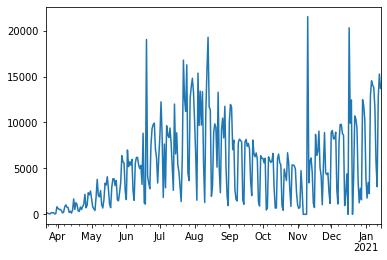

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0) 

# Leitura dos dados de COVID-19 no estado de SP em 2020 - vamos trabalhar com os casos
covidSP = pd.read_csv("https://github.com/predict-icmc/covid19/raw/master/leitura-dados/sp_ts_.csv", index_col = 'date', parse_dates = True).head(325).tail(300)

idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')
covidSP = covidSP.reindex(idx)
covidSP.fillna(0,inplace=True)

covidSP['newCases'].plot()

In [ ]:
covidSP.index.max()


Timestamp('2021-01-14 00:00:00', freq='D')

Vamos considerar a decomposição em sazonalidade e tendência em um modelo aditivo, nesse caso porque temos muitos zeros.

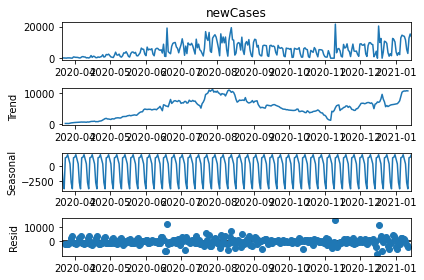

In [ ]:
result = seasonal_decompose(covidSP['newCases'], model='additive')
result.plot();

Há sazonalidade nos dados, devido à sistemática de notificações

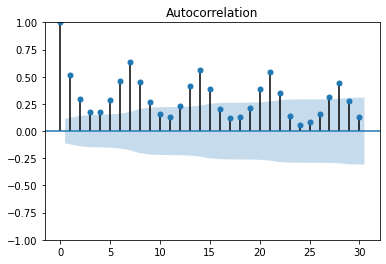

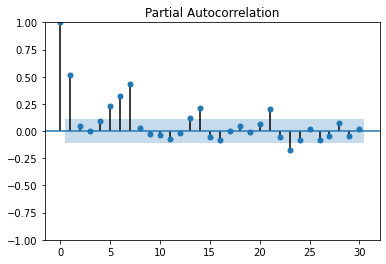

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

# Correlograma

plot_acf(covidSP['newCases'], lags=30)
plot_pacf(covidSP['newCases'], lags=30)
plt.show()

In [ ]:
# Ajuste de modelo SARIMA 

auto_arima(covidSP['newCases'],seasonal=True,m=7).summary()


stepwise_fit = auto_arima(covidSP['newCases'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5769.647, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5858.422, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5767.249, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5708.476, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5856.457, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=5759.809, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=5639.307, Time=1.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=5677.351, Time=0.55 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=5631.229, Time=2.01 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=5655.366, Time=1.75 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=2.24 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=5645.385, Time=1.83 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=5771.818, Time=1.53 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=5646.413, Time=1.81 sec
 ARIMA(0,1,2)(2,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  300
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2806.269
Date:                           Fri, 09 Dec 2022   AIC                           5620.539
Time:                                   21:18:48   BIC                           5635.341
Sample:                               03-21-2020   HQIC                          5626.463
                                    - 01-14-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8935      0.029    -30.813      0.000      -0.950      -0.837
ar.S.L7        0.9723      0.031     31.060      0.000       0.911       1.034
ma.S.L7       -0.7794      0.066    -11.847      0.000      -0.908      -0.650
sigma2      8.112e+06   3.42e+05     23.717      0.000    7.44e+06    8.78e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):              1453.77
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               3.45   Skew:                             1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
len(covidSP)

300

In [ ]:
len(covidSP)*0.9

270.0

In [ ]:
treino = covidSP.iloc[:278]
teste = covidSP.iloc[278:]

In [ ]:
modelo = SARIMAX(treino['newCases'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          newCases   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -2591.704
Date:                           Fri, 09 Dec 2022   AIC                           5191.408
Time:                                   21:18:50   BIC                           5205.904
Sample:                               03-21-2020   HQIC                          5197.225
                                    - 12-23-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9017      0.029    -30.960      0.000      -0.959      -0.845
ar.S.L7        0.9602      0.040     24.056      0.000       0.882       1.038
ma.S.L7       -0.7401      0.081     -9.190      0.000      -0.898      -0.582
sigma2      7.664e+06   3.02e+05     25.343      0.000    7.07e+06    8.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2014.38
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
resultado.fittedvalues

2020-03-21       0.000000
2020-03-22      32.999639
2020-03-23      81.418062
2020-03-24      90.026044
2020-03-25      84.629542
                 ...     
2020-12-19    7728.058806
2020-12-20    4433.936756
2020-12-21    3453.491379
2020-12-22    8415.669909
2020-12-23    7518.072313
Freq: D, Length: 278, dtype: float64

In [ ]:
# Obtain predicted values
inicio=len(treino)
fim=len(treino)+len(teste)-1
previsões = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
previsões.index = teste.index


In [ ]:
previsões

2020-12-24    11820.443277
2020-12-25     9445.630937
2020-12-26     9649.041363
2020-12-27     4127.687263
2020-12-28     4592.761358
2020-12-29     9720.053158
2020-12-30     8815.660493
2020-12-31    12107.659831
2021-01-01     9827.349712
2021-01-02    10022.665714
2021-01-03     4721.025912
2021-01-04     5167.593056
2021-01-05    10090.851698
2021-01-06     9222.448030
2021-01-07    12383.447018
2021-01-08    10193.878540
2021-01-09    10381.422225
2021-01-10     5290.753507
2021-01-11     5719.550158
2021-01-12    10446.894846
2021-01-13     9613.048046
2021-01-14    12648.259652
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

Passar <tt> dynamic = False </tt> significa que as previsões em cada ponto são geradas usando o histórico completo até aquele ponto (todos os valores defasados).

Passar <tt> typ = 'levels' </tt> prevê os níveis das variáveis endógenas originais. Se tivéssemos usado o padrão <tt> typ = 'linear' </tt>, teríamos visto previsões lineares em termos de variáveis endógenas diferenciadas.

Para obter mais informações sobre esses argumentos, visite https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [ ]:
for i in range(len(previsões)):
    print(f"predicted={previsões[i]:<11.10}, expected={teste['newCases'][i]}")

predicted=11820.44328, expected=9351
predicted=9445.630937, expected=3596
predicted=9649.041363, expected=1253
predicted=4127.687263, expected=2836
predicted=4592.761358, expected=1576
predicted=9720.053158, expected=12477
predicted=8815.660493, expected=11849
predicted=12107.65983, expected=10219
predicted=9827.349712, expected=3894
predicted=10022.66571, expected=1762
predicted=4721.025912, expected=3469
predicted=5167.593056, expected=2248
predicted=10090.8517 , expected=12881
predicted=9222.44803 , expected=14534
predicted=12383.44702, expected=14073
predicted=10193.87854, expected=13794
predicted=10381.42222, expected=11561
predicted=5290.753507, expected=5619
predicted=5719.550158, expected=3010
predicted=10446.89485, expected=12702
predicted=9613.048046, expected=15275
predicted=12648.25965, expected=13710


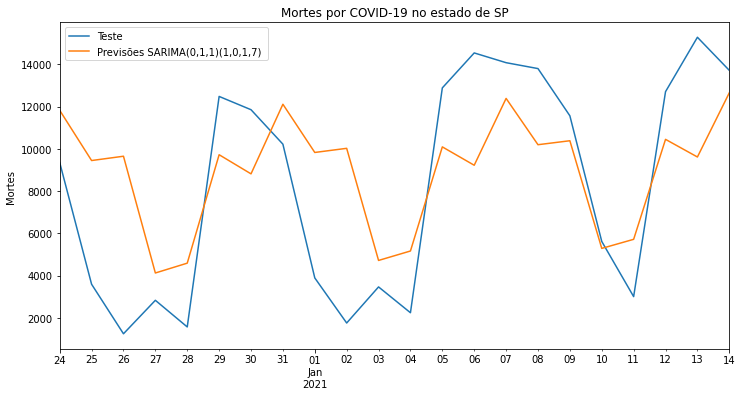

In [ ]:
# Plot predictions against known values
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes '
xlabel=''

ax = teste['newCases'].plot(legend=True,figsize=(12,6),title=title, label='Teste')
previsões.plot(legend=True)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

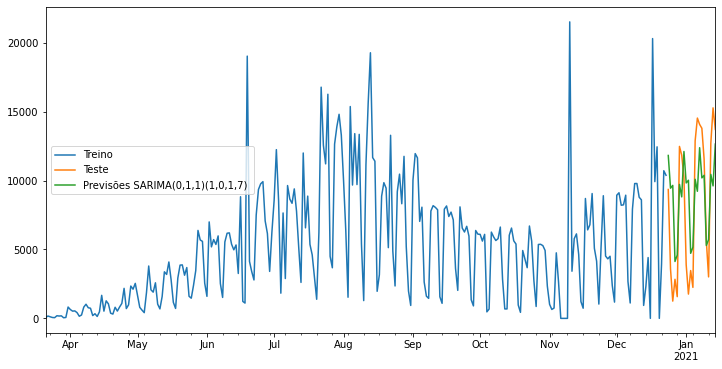

In [ ]:
treino['newCases'].plot(legend=True, label='Treino')
teste['newCases'].plot(legend=True, label='Teste')
previsões.plot(legend=True, figsize=(12,6))

### Previsões para dados cujos tempos ainda não estão nas bases

In [ ]:
modelo = SARIMAX(covidSP['newCases'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultados = modelo.fit()
fcast = resultados.predict(len(covidSP),len(covidSP)+14,typ='levels').rename('Previsões SARIMA(4,0,0)(2,1,0,7)')

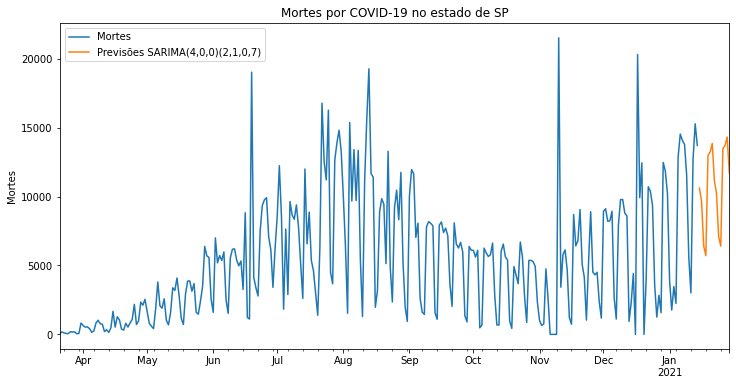

In [ ]:
title = 'Mortes por COVID-19 no estado de SP'
ylabel='Mortes'
xlabel=''

ax = covidSP['newCases'].plot(legend=True,figsize=(12,6),title=title, label='Mortes')
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Diagnóstico em modelos SARIMA

### Métricas

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['newCases'], previsões)
print(f'EQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

EQM SARIMA(0,1,1)(1,0,1,7): 16109418.03


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(teste['newCases'], previsões)
print(f'REQM SARIMA(0,1,1)(1,0,1,7): {error:11.10}')

REQM SARIMA(0,1,1)(1,0,1,7): 4013.653949


### Análise de resíduos

Considere inicialmente um modelo ARIMA

$$\phi(B) W_t = \theta(B) a_t$$ com $W_t = \Delta^d Z_t$ supondo que $a_t$ é um ruído branco.

Se o modelo for verdadeiro, então os erros verdadeiros $a_t = \theta^{-1}(B) \phi(B) W_t$ devem ser um ruído branco.

Uma análise equivalente poderia ser feita para modelos mais gerais SARIMA.

Quando o modelo é estimado, ou seja, quando são obtidos $\widehat{\theta}$ e $\widehat{\phi}$, as quantidades

$$\widehat{a}_t = \widehat{\theta}^{-1}(B) \widehat{\phi}(B) W_t$$

são chamadas de **resíduos**. Se o modelo for correto, eles devem ser aproximadamente não correlacionados.

Uma forma de analisar os resíduos ajustados é simplesmente considerar

$$r_t = Z_t - \widehat{Z}_t$$

e podemos analisar a distribuição, estatísticas descritivas, a autocorrelação dos resíduos e verificar se existe algum padrão nos mesmos.

In [ ]:
# Uma forma de obter os resíduos pelo ajuste do modelo

resíduos = resultados.resid

In [ ]:
resíduos.describe()

count      300.000000
mean       106.391569
std       2846.537689
min      -8140.496682
25%      -1035.097774
50%         63.678134
75%       1108.998919
max      19521.459849
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f189e0fe130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f189e0fe7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f189e122d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f189e0feeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f189e4e11f0>],
 'means': []}

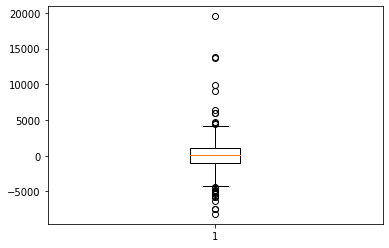

In [ ]:
plt.boxplot(resíduos)

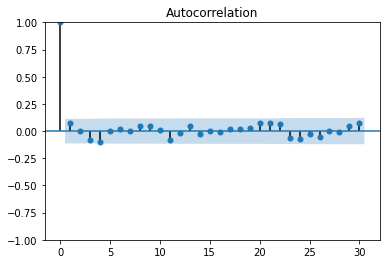

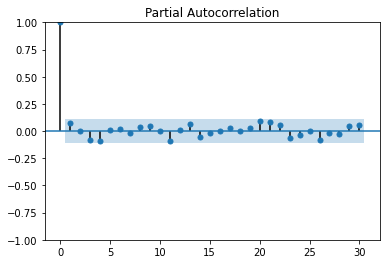

In [ ]:
plot_acf(resíduos, lags=30)
plot_pacf(resíduos, lags=30)
plt.show()

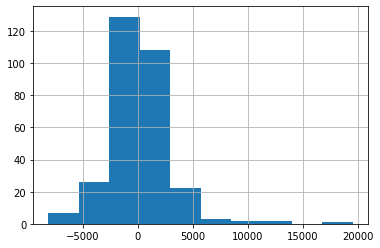

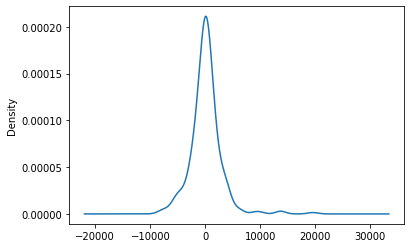

In [ ]:
from matplotlib import pyplot


resíduos.hist()

pyplot.show()
resíduos.plot(kind='kde')
pyplot.show()

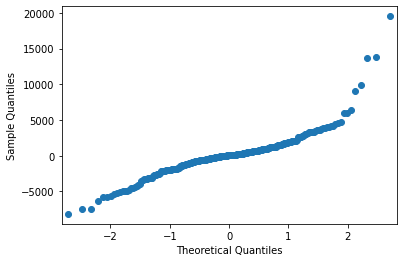

In [ ]:
from statsmodels.graphics.gofplots import qqplot

qqplot(resíduos)
pyplot.show()


## Referências

- Moretting, P.A.; Toloi, C.M.C. “Análise de Séries Temporais”. Blucher, 2004.

- Ehlers, R.S. (2009) Análise de Séries Temporais, http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf. Acessado em 28/06/2020.


- Brownlee, Jason. Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery, 2017.


- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.
